In [204]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [205]:
transform=transforms.ToTensor()

In [206]:
pwd

'C:\\Users\\SEEMA YADAV\\Desktop\\AI-MachineLearning\\03-CNN-Convolutional-Neural-Networks'

In [207]:
train_data=datasets.MNIST(root='C:\\Users\\SEEMA YADAV\\Desktop',train=True,download=True,
                         transform=transform)

In [208]:
test_data=datasets.MNIST(root='C:\\Users\\SEEMA YADAV\\Desktop',train=False,download=True,
                         transform=transform)

In [209]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\SEEMA YADAV\Desktop
    Split: Train
    StandardTransform
Transform: ToTensor()

In [210]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\SEEMA YADAV\Desktop
    Split: Test
    StandardTransform
Transform: ToTensor()

In [211]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [212]:
for b,(train,test) in enumerate(train_data):
    break

In [213]:
train.size()

torch.Size([1, 28, 28])

In [214]:
conv1=nn.Conv2d(1,6,3,1)
conv2=nn.Conv2d(6,16,3,1)

In [215]:
x=train.view(1,1,28,28)

In [216]:
x=F.relu(conv1(x))

In [217]:
x.size()

torch.Size([1, 6, 26, 26])

In [218]:
x=F.max_pool2d(x,2,2)

In [219]:
x.size()

torch.Size([1, 6, 13, 13])

In [220]:
x=F.relu(conv2(x))

In [221]:
x.size()

torch.Size([1, 16, 11, 11])

In [222]:
x=F.max_pool2d(x,2,2)

In [223]:
x.size()

torch.Size([1, 16, 5, 5])

In [224]:
x=x.view(1,-1)

In [225]:
x.size()

torch.Size([1, 400])

In [226]:
class conv_architect(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(400,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv2(x))
        x=F.max_pool2d(x,2,2)
        x=x.view(-1,400)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        return F.log_softmax(x,dim=1)

In [227]:
torch.manual_seed(42)
model=conv_architect()

In [228]:
print(model)

conv_architect(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [229]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [230]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [231]:
#for b,(train,test) in enumerate(train_loader):
#    pass
#train.size()

In [232]:
import time
start_time=time.time()

train_loss=[]
test_loss=[]
trn_correct=[]
tst_correct=[]

epochs=6

for i in range(epochs):
    trn=0
    tst=0
    i+=1
    
    for b,(x_train,y_train) in  enumerate(train_loader):
        b+=1
        
        y_pred=model.forward(x_train)
        loss=criterion(y_pred,y_train)
        predicted=torch.max(y_pred.data,1)[1]
        trn+=(predicted==y_train).sum()
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600==0: 
            print(f'epoch:{i} batch:{b} loss:{loss.item()}')
        
    train_loss.append(loss)
    trn_correct.append(trn)
    
    with torch.no_grad():
        for b,(x_test,y_test) in enumerate(test_loader):
            b+=1
            y_pred=model.forward(x_test)
            predicted=torch.max(y_pred.data,1)[1]
            tst+=(predicted==y_test).sum()
            
    loss=criterion(y_pred,y_test)
    test_loss.append(loss)
    tst_correct.append(tst)
    




current_time=time.time()
total_time=current_time-start_time
print(f'{total_time/60} minutes')

epoch:1 batch:600 loss:0.40777215361595154
epoch:1 batch:1200 loss:0.12517264485359192
epoch:1 batch:1800 loss:0.05623014643788338
epoch:1 batch:2400 loss:0.060953281819820404
epoch:1 batch:3000 loss:0.002896189223974943
epoch:1 batch:3600 loss:0.017134156078100204
epoch:1 batch:4200 loss:0.15663571655750275
epoch:1 batch:4800 loss:0.005714830942451954
epoch:1 batch:5400 loss:0.0005257712909951806
epoch:1 batch:6000 loss:0.05948800966143608
epoch:2 batch:600 loss:0.02005644701421261
epoch:2 batch:1200 loss:0.053263336420059204
epoch:2 batch:1800 loss:0.015455096960067749
epoch:2 batch:2400 loss:0.0040410710498690605
epoch:2 batch:3000 loss:0.002596080768853426
epoch:2 batch:3600 loss:0.0653887540102005
epoch:2 batch:4200 loss:0.04863394796848297
epoch:2 batch:4800 loss:0.20608308911323547
epoch:2 batch:5400 loss:0.01518976129591465
epoch:2 batch:6000 loss:0.026488423347473145
epoch:3 batch:600 loss:0.0009302905527874827
epoch:3 batch:1200 loss:0.014466042630374432
epoch:3 batch:1800 lo

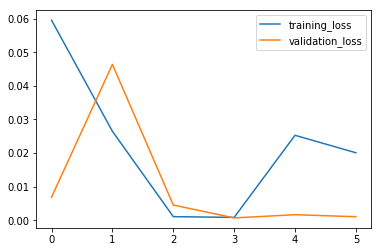

In [233]:
plt.plot(range(epochs),train_loss,label='training_loss')
plt.plot(range(epochs),test_loss,label='validation_loss')
plt.legend()

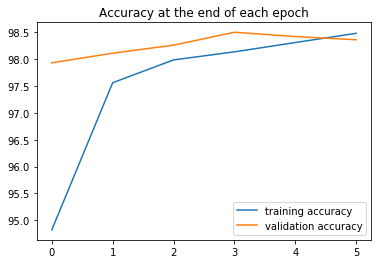

In [234]:
plt.plot([t/600 for t in trn_correct], label='training accuracy')
plt.plot([t/100 for t in tst_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [236]:
test_loadall=DataLoader(test_data,batch_size=10000,shuffle=False)

In [237]:
correct=0
with torch.no_grad():
    for x_test,y_test in test_loadall:
        pred=model.forward(x_test)
        predict=torch.max(pred.data,1)[1]
        correct+=(predict==y_test).sum()
        

In [240]:
correct/len(x_test)

tensor(0.9836)

In [243]:
confusion_matrix(predict.view(-1),y_test.view(-1))

array([[ 973,    2,    3,    0,    0,    1,    2,    0,    1,    0],
       [   0, 1126,    0,    0,    0,    0,    2,    1,    0,    2],
       [   0,    2, 1003,    3,    3,    0,    0,    8,    1,    0],
       [   0,    0,    0,  990,    0,    4,    0,    1,    0,    2],
       [   0,    0,    0,    0,  962,    0,    2,    0,    0,    0],
       [   1,    0,    0,    2,    0,  878,    3,    1,    2,    8],
       [   3,    1,    0,    0,    5,    6,  948,    0,    3,    1],
       [   2,    3,    7,    5,    1,    1,    0, 1011,    1,    3],
       [   1,    1,   19,    9,    2,    2,    1,    2,  966,   14],
       [   0,    0,    0,    1,    9,    0,    0,    4,    0,  979]],
      dtype=int64)

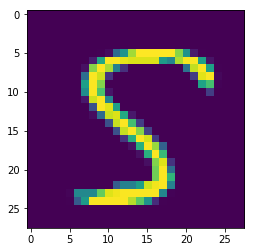

In [253]:
plt.imshow(test_data[333][0].view(28,28))

In [254]:
with torch.no_grad():
    y=model.forward(test_data[333][0].view(1,1,28,28))

In [255]:
y.argmax()

tensor(5)